# Scatter Plots

## Scatter Plot

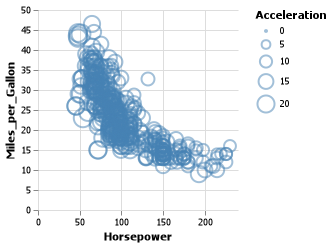

In [2]:
using VegaLite, VegaDatasets

@vgplot(    
    height=200,
    padding=5,
    marks=[
        {
            name="marks",
            encode={
                update={
                    shape={
                        value="circle"
                    },
                    stroke={
                        value="#4682b4"
                    },
                    x={
                        field="Horsepower",
                        scale="x"
                    },
                    strokeWidth={
                        value=2
                    },
                    size={
                        field="Acceleration",
                        scale="size"
                    },
                    fill={
                        value="transparent"
                    },
                    opacity={
                        value=0.5
                    },
                    y={
                        field="Miles_per_Gallon",
                        scale="y"
                    }
                }
            },
            from={
                data="source"
            },
            type="symbol"
        }
    ],
    axes=[
        {
            domain=false,
            tickCount=5,
            grid=true,
            title="Horsepower",
            scale="x",
            orient="bottom"
        },
        {
            domain=false,
            grid=true,
            titlePadding=5,
            title="Miles_per_Gallon",
            scale="y",
            orient="left"
        }
    ],
    data=[
        {
            name="source",
            values=dataset("cars"),
            transform=[
                {
                    expr="datum['Horsepower'] != null && datum['Miles_per_Gallon'] != null && datum['Acceleration'] != null",
                    type="filter"
                }
            ]
        }
    ],
    scales=[
        {
            name="x",
            nice=true,
            zero=true,
            range="width",
            domain={
                data="source",
                field="Horsepower"
            },
            type="linear",
            round=true
        },
        {
            name="y",
            nice=true,
            zero=true,
            range="height",
            domain={
                data="source",
                field="Miles_per_Gallon"
            },
            type="linear",
            round=true
        },
        {
            name="size",
            nice=false,
            zero=true,
            range=[
                4,
                361
            ],
            domain={
                data="source",
                field="Acceleration"
            },
            type="linear",
            round=true
        }
    ],
    width=200,
    legends=[
        {
            symbolOpacity=0.5,
            format="s",
            symbolStrokeWidth=2,
            title="Acceleration",
            size="size",
            symbolStrokeColor="#4682b4",
            symbolType="circle"
        }
    ]
)

## Scatter Plot Null Values

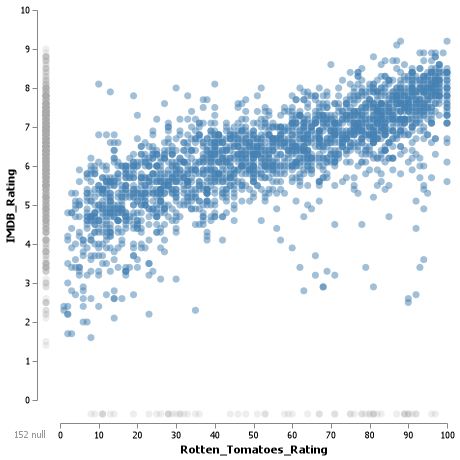

In [3]:
using VegaLite, VegaDatasets

@vgplot(
    height=450,
    padding=5,
    marks=[
        {
            encode={
                update={
                    x={
                        field={
                            signal="xField"
                        },
                        scale="xscale"
                    },
                    zindex={
                        value=0
                    },
                    fillOpacity={
                        value=0.5
                    },
                    fill={
                        value="steelblue"
                    },
                    y={
                        field={
                            signal="yField"
                        },
                        scale="yscale"
                    }
                },
                hover={
                    zindex={
                        value=1
                    },
                    fillOpacity={
                        value=1
                    },
                    fill={
                        value="firebrick"
                    }
                },
                enter={
                    tooltip={
                        field="tooltip"
                    },
                    size={
                        value=50
                    }
                }
            },
            from={
                data="valid"
            },
            type="symbol"
        },
        {
            encode={
                update={
                    x={
                        field={
                            signal="xField"
                        },
                        scale="xscale"
                    },
                    fillOpacity={
                        value=0.2
                    },
                    fill={
                        value="#aaa"
                    },
                    y={
                        signal="height - nullSize/2"
                    }
                },
                hover={
                    fillOpacity={
                        value=1
                    },
                    fill={
                        value="firebrick"
                    }
                },
                enter={
                    tooltip={
                        field="tooltip"
                    },
                    size={
                        value=50
                    }
                }
            },
            from={
                data="nullY"
            },
            type="symbol"
        },
        {
            encode={
                update={
                    x={
                        signal="nullSize/2"
                    },
                    zindex={
                        value=0
                    },
                    fillOpacity={
                        value=0.2
                    },
                    fill={
                        value="#aaa"
                    },
                    y={
                        field={
                            signal="yField"
                        },
                        scale="yscale"
                    }
                },
                hover={
                    zindex={
                        value=1
                    },
                    fillOpacity={
                        value=1
                    },
                    fill={
                        value="firebrick"
                    }
                },
                enter={
                    tooltip={
                        field="tooltip"
                    },
                    size={
                        value=50
                    }
                }
            },
            from={
                data="nullX"
            },
            type="symbol"
        },
        {
            encode={
                update={
                    align={
                        value="right"
                    },
                    x={
                        offset=-4,
                        signal="nullSize"
                    },
                    fontSize={
                        value=9
                    },
                    text={
                        signal="datum.count + ' null'"
                    },
                    baseline={
                        value="top"
                    },
                    fill={
                        value="#999"
                    },
                    y={
                        offset=13,
                        signal="height"
                    }
                }
            },
            interactive=false,
            from={
                data="nullXY"
            },
            type="text"
        }
    ],
    axes=[
        {
            format="s",
            offset=5,
            title={
                signal="xField"
            },
            scale="xscale",
            orient="bottom"
        },
        {
            format="s",
            offset=5,
            title={
                signal="yField"
            },
            scale="yscale",
            orient="left"
        }
    ],
    data=[
        {
            name="movies",
            values=dataset("movies"),
            transform=[
                {
                    as="tooltip",
                    expr="datum.Title + ' (' + (year(datum.Release_Date) || '?') + ')'",
                    type="formula"
                }
            ]
        },
        {
            name="valid",
            source="movies",
            transform=[
                {
                    expr="datum[xField] != null && datum[yField] != null",
                    type="filter"
                }
            ]
        },
        {
            name="nullXY",
            source="movies",
            transform=[
                {
                    expr="datum[xField] == null && datum[yField] == null",
                    type="filter"
                },
                {
                    type="aggregate"
                }
            ]
        },
        {
            name="nullY",
            source="movies",
            transform=[
                {
                    expr="datum[xField] != null && datum[yField] == null",
                    type="filter"
                }
            ]
        },
        {
            name="nullX",
            source="movies",
            transform=[
                {
                    expr="datum[xField] == null && datum[yField] != null",
                    type="filter"
                }
            ]
        }
    ],
    scales=[
        {
            name="yscale",
            nice=true,
            range=[
                {
                    signal="height - nullGap"
                },
                0
            ],
            domain={
                data="valid",
                field={
                    signal="yField"
                }
            },
            type="linear"
        },
        {
            name="xscale",
            nice=true,
            range=[
                {
                    signal="nullGap"
                },
                {
                    signal="width"
                }
            ],
            domain={
                data="valid",
                field={
                    signal="xField"
                }
            },
            type="linear"
        }
    ],
    width=450,
    autosize={
        type="fit",
        resize=true
    },
    signals=[
        {
            name="yField",
            bind={
                options=[
                    "IMDB_Rating",
                    "Rotten_Tomatoes_Rating",
                    "US_Gross",
                    "Worldwide_Gross"
                ],
                input="select"
            },
            value="IMDB_Rating"
        },
        {
            name="xField",
            bind={
                options=[
                    "IMDB_Rating",
                    "Rotten_Tomatoes_Rating",
                    "US_Gross",
                    "Worldwide_Gross"
                ],
                input="select"
            },
            value="Rotten_Tomatoes_Rating"
        },
        {
            name="nullSize",
            value=8
        },
        {
            name="nullGap",
            update="nullSize + 10"
        }
    ]
)

## Connected Scatter Plot

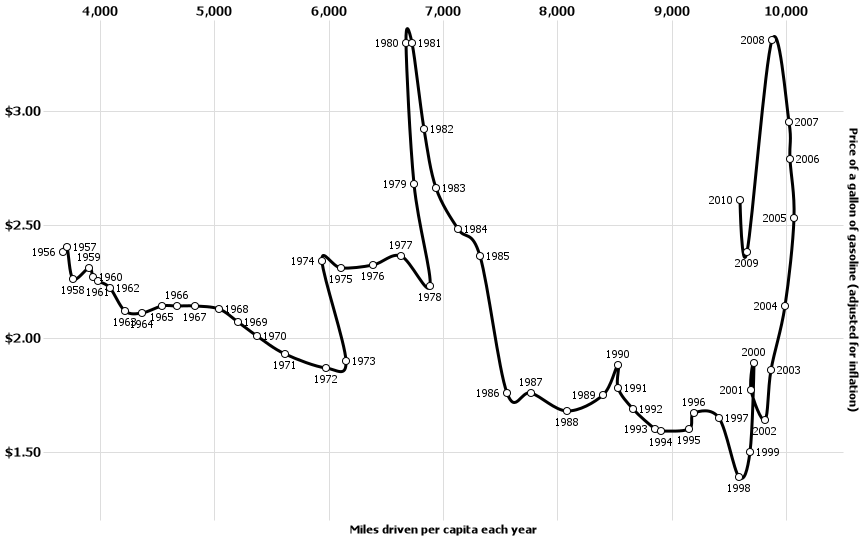

In [4]:
using VegaLite, VegaDatasets

@vgplot(
    height=500,
    padding=5,
    marks=[
        {
            encode={
                enter={
                    stroke={
                        value="#000"
                    },
                    interpolate={
                        value="cardinal"
                    },
                    x={
                        field="miles",
                        scale="x"
                    },
                    strokeWidth={
                        value=3
                    },
                    y={
                        field="gas",
                        scale="y"
                    }
                }
            },
            from={
                data="drive"
            },
            type="line"
        },
        {
            encode={
                enter={
                    stroke={
                        value="#000"
                    },
                    x={
                        field="miles",
                        scale="x"
                    },
                    strokeWidth={
                        value=1
                    },
                    size={
                        value=49
                    },
                    fill={
                        value="#fff"
                    },
                    y={
                        field="gas",
                        scale="y"
                    }
                }
            },
            from={
                data="drive"
            },
            type="symbol"
        },
        {
            encode={
                enter={
                    align={
                        field="side",
                        scale="align"
                    },
                    x={
                        field="miles",
                        scale="x"
                    },
                    dy={
                        field="side",
                        scale="dy"
                    },
                    dx={
                        field="side",
                        scale="dx"
                    },
                    fill={
                        value="#000"
                    },
                    text={
                        field="year"
                    },
                    baseline={
                        field="side",
                        scale="base"
                    },
                    y={
                        field="gas",
                        scale="y"
                    }
                }
            },
            from={
                data="drive"
            },
            type="text"
        }
    ],
    config={
        axis={
            labelFontSize=12,
            domain=false,
            labelFontWeight="bold",
            tickSize=0
        }
    },
    axes=[
        {
            tickCount=5,
            grid=true,
            scale="x",
            orient="top"
        },
        {
            labels=false,
            title="Miles driven per capita each year",
            scale="x",
            orient="bottom",
            ticks=false
        },
        {
            format="\$0.2f",
            tickCount=5,
            grid=true,
            scale="y",
            orient="left"
        },
        {
            labels=false,
            title="Price of a gallon of gasoline (adjusted for inflation)",
            scale="y",
            orient="right",
            ticks=false
        }
    ],
    data=[:drive=>dataset("driving")],
    scales=[
        {
            name="x",
            nice=true,
            zero=false,
            range="width",
            domain={
                data="drive",
                field="miles"
            },
            type="linear",
            round=true
        },
        {
            name="y",
            nice=true,
            zero=false,
            range="height",
            domain={
                data="drive",
                field="gas"
            },
            type="linear",
            round=true
        },
        {
            name="align",
            range=[
                "right",
                "left",
                "center",
                "center"
            ],
            domain=[
                "left",
                "right",
                "top",
                "bottom"
            ],
            type="ordinal"
        },
        {
            name="base",
            range=[
                "middle",
                "middle",
                "bottom",
                "top"
            ],
            domain=[
                "left",
                "right",
                "top",
                "bottom"
            ],
            type="ordinal"
        },
        {
            name="dx",
            range=[
                -7,
                6,
                0,
                0
            ],
            domain=[
                "left",
                "right",
                "top",
                "bottom"
            ],
            type="ordinal"
        },
        {
            name="dy",
            range=[
                1,
                1,
                -5,
                6
            ],
            domain=[
                "left",
                "right",
                "top",
                "bottom"
            ],
            type="ordinal"
        }
    ],
    width=800
)

## Error Bars

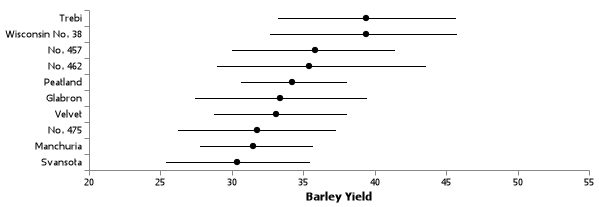

In [5]:
using VegaLite, VegaDatasets

@vgplot(
    height=160,
    padding=5,
    marks=[
        {
            encode={
                update={
                    x2={
                        signal="datum[measure+'1']",
                        scale="xscale"
                    },
                    x={
                        signal="datum[measure+'0']",
                        scale="xscale"
                    },
                    y={
                        field="variety",
                        scale="yscale",
                        band=0.5
                    }
                },
                enter={
                    height={
                        value=1
                    },
                    fill={
                        value="black"
                    }
                }
            },
            from={
                data="summary"
            },
            type="rect"
        },
        {
            encode={
                update={
                    x={
                        field="mean",
                        scale="xscale"
                    },
                    y={
                        field="variety",
                        scale="yscale",
                        band=0.5
                    }
                },
                enter={
                    size={
                        value=40
                    },
                    fill={
                        value="black"
                    }
                }
            },
            from={
                data="summary"
            },
            type="symbol"
        }
    ],
    config={
        axisBand={
            tickOffset=0,
            tickExtra=true,
            bandPosition=1
        }
    },
    axes=[
        {
            zindex=1,
            title="Barley Yield",
            scale="xscale",
            orient="bottom"
        },
        {
            tickCount=5,
            zindex=1,
            scale="yscale",
            orient="left"
        }
    ],
    data=[
        :barley=>dataset("barley"),
        {
            name="summary",
            source="barley",
            transform=[
                {
                    fields=[
                        "yield",
                        "yield",
                        "yield",
                        "yield",
                        "yield",
                        "yield",
                        "yield"
                    ],
                    ops=[
                        "mean",
                        "stdev",
                        "stderr",
                        "ci0",
                        "ci1",
                        "q1",
                        "q3"
                    ],
                    as=[
                        "mean",
                        "stdev",
                        "stderr",
                        "ci0",
                        "ci1",
                        "iqr0",
                        "iqr1"
                    ],
                    groupby=[
                        "variety"
                    ],
                    type="aggregate"
                },
                {
                    as="stdev0",
                    expr="datum.mean - datum.stdev",
                    type="formula"
                },
                {
                    as="stdev1",
                    expr="datum.mean + datum.stdev",
                    type="formula"
                },
                {
                    as="stderr0",
                    expr="datum.mean - datum.stderr",
                    type="formula"
                },
                {
                    as="stderr1",
                    expr="datum.mean + datum.stderr",
                    type="formula"
                }
            ]
        }
    ],
    scales=[
        {
            name="yscale",
            range="height",
            domain={
                sort={
                    order="descending",
                    field="mean",
                    op="max"
                },
                data="summary",
                field="variety"
            },
            type="band"
        },
        {
            name="xscale",
            zero=false,
            nice=true,
            range="width",
            domain={
                fields=[
                    "stdev0",
                    "stdev1"
                ],
                data="summary"
            },
            type="linear",
            round=true
        }
    ],
    width=500,
    signals=[
        {
            name="errorMeasure",
            bind={
                options=[
                    "95% Confidence Interval",
                    "Standard Error",
                    "Standard Deviation",
                    "Interquartile Range"
                ],
                input="select"
            },
            value="95% Confidence Interval"
        },
        {
            name="lookup",
            value={
                var"95% Confidence Interval"="ci",
                var"Standard Deviation"="stdev",
                var"Interquartile Range"="iqr",
                var"Standard Error"="stderr"
            }
        },
        {
            name="measure",
            update="lookup[errorMeasure]"
        }
    ]
)

## Barley Trellis Plot

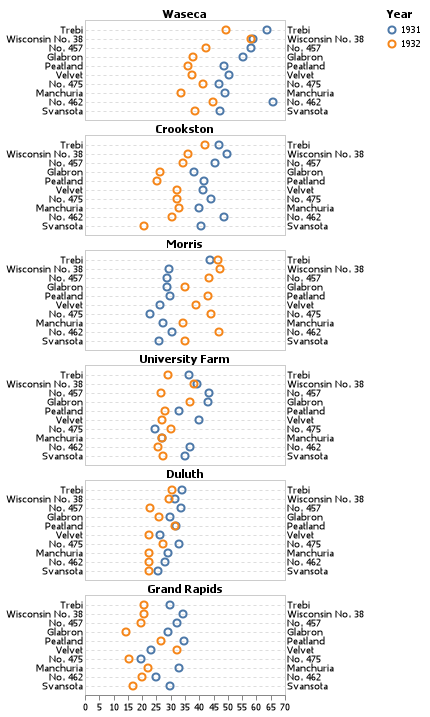

In [6]:
using VegaLite, VegaDatasets

@vgplot(
    padding=5,
    marks=[
        {
            name="site",
            marks=[
                {
                    encode={
                        enter={
                            stroke={
                                field="year",
                                scale="cscale"
                            },
                            x={
                                field="yield",
                                scale="xscale"
                            },
                            strokeWidth={
                                value=2
                            },
                            size={
                                value=50
                            },
                            y={
                                field="variety",
                                scale="yscale"
                            }
                        }
                    },
                    from={
                        data="sites"
                    },
                    type="symbol"
                }
            ],
            encode={
                enter={
                    height={
                        signal="cellHeight"
                    },
                    stroke={
                        value="#ccc"
                    },
                    width={
                        signal="width"
                    },
                    y={
                        offset={
                            signal="offset"
                        },
                        field="site",
                        scale="gscale"
                    }
                }
            },
            axes=[
                {
                    domain=false,
                    encode={
                        grid={
                            enter={
                                strokeDash={
                                    value=[
                                        3,
                                        3
                                    ]
                                }
                            }
                        }
                    },
                    grid=true,
                    scale="yscale",
                    orient="left",
                    tickSize=0
                },
                {
                    domain=false,
                    scale="yscale",
                    orient="right",
                    tickSize=0
                }
            ],
            scales=[
                {
                    name="yscale",
                    padding=1,
                    range=[
                        0,
                        {
                            signal="cellHeight"
                        }
                    ],
                    domain={
                        sort={
                            order="descending",
                            field="yield",
                            op="median"
                        },
                        data="barley",
                        field="variety"
                    },
                    type="point",
                    round=true
                }
            ],
            from={
                facet={
                    name="sites",
                    data="barley",
                    groupby="site"
                }
            },
            type="group"
        },
        {
            encode={
                enter={
                    fontWeight={
                        value="bold"
                    },
                    align={
                        value="center"
                    },
                    x={
                        mult=0.5,
                        field="width"
                    },
                    fontSize={
                        value=11
                    },
                    text={
                        field="datum.site"
                    },
                    baseline={
                        value="bottom"
                    },
                    fill={
                        value="#000"
                    },
                    y={
                        field="y"
                    }
                }
            },
            from={
                data="site"
            },
            type="text"
        }
    ],
    axes=[
        {
            zindex=1,
            scale="xscale",
            orient="bottom"
        }
    ],
    data=[:barley=>dataset("barley")],
    scales=[
        {
            name="gscale",
            range=[
                0,
                {
                    signal="height"
                }
            ],
            domain={
                sort={
                    order="descending",
                    field="yield",
                    op="median"
                },
                data="barley",
                field="site"
            },
            type="band",
            round=true
        },
        {
            name="xscale",
            nice=true,
            range="width",
            domain={
                data="barley",
                field="yield"
            },
            type="linear",
            round=true
        },
        {
            name="cscale",
            range="category",
            domain={
                data="barley",
                field="year"
            },
            type="ordinal"
        }
    ],
    width=200,
    signals=[
        {
            name="offset",
            value=15
        },
        {
            name="cellHeight",
            value=100
        },
        {
            name="height",
            update="6 * (offset + cellHeight)"
        }
    ],
    legends=[
        {
            stroke="cscale",
            padding=4,
            encode={
                symbols={
                    enter={
                        strokeWidth={
                            value=2
                        },
                        size={
                            value=50
                        }
                    }
                }
            },
            title="Year"
        }
    ]
)

## Regression

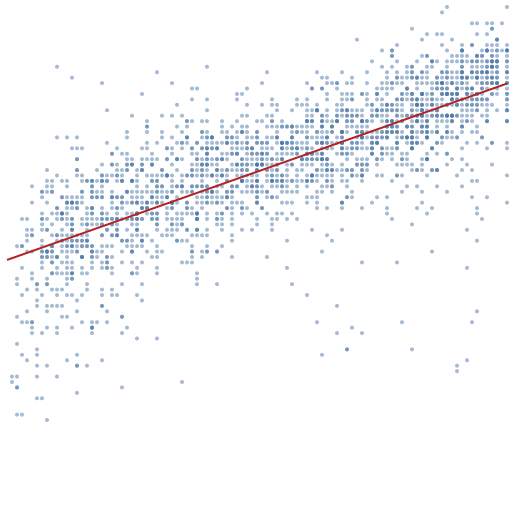

In [7]:
using VegaLite, VegaDatasets

@vgplot(
    height=500,
    padding=5,
    marks=[
        {
            encode={
                enter={
                    x={
                        field="Rotten_Tomatoes_Rating",
                        scale="x"
                    },
                    fillOpacity={
                        value=0.5
                    },
                    size={
                        value=16
                    },
                    y={
                        field="IMDB_Rating",
                        scale="y"
                    }
                }
            },
            from={
                data="movies"
            },
            type="symbol"
        },
        {
            marks=[
                {
                    encode={
                        enter={
                            stroke={
                                value="firebrick"
                            },
                            x={
                                field="u",
                                scale="x"
                            },
                            y={
                                field="v",
                                scale="y"
                            }
                        }
                    },
                    from={
                        data="curve"
                    },
                    type="line"
                }
            ],
            from={
                facet={
                    name="curve",
                    data="trend",
                    groupby="Major_Genre"
                }
            },
            type="group"
        }
    ],
    data=[
        {
            name="movies",
            values=dataset("movies"),
            transform=[
                {
                    expr="datum.Rotten_Tomatoes_Rating != null && datum.IMDB_Rating != null",
                    type="filter"
                }
            ]
        },
        {
            name="trend",
            source="movies",
            transform=[
                {
                    method={
                        signal="method"
                    },
                    order={
                        signal="polyOrder"
                    },
                    x="Rotten_Tomatoes_Rating",
                    as=[
                        "u",
                        "v"
                    ],
                    groupby=[
                        {
                            signal="groupby === 'genre' ? 'Major_Genre' : 'foo'"
                        }
                    ],
                    type="regression",
                    extent={
                        signal="domain('x')"
                    },
                    y="IMDB_Rating"
                }
            ]
        }
    ],
    scales=[
        {
            name="x",
            range="width",
            domain={
                data="movies",
                field="Rotten_Tomatoes_Rating"
            },
            type="linear"
        },
        {
            name="y",
            range="height",
            domain={
                data="movies",
                field="IMDB_Rating"
            },
            type="linear"
        }
    ],
    width=500,
    autosize="pad",
    signals=[
        {
            name="method",
            bind={
                options=[
                    "linear",
                    "log",
                    "exp",
                    "pow",
                    "quad",
                    "poly"
                ],
                input="select"
            },
            value="linear"
        },
        {
            name="polyOrder",
            bind={
                step=1,
                max=10,
                min=1,
                input="range"
            },
            value=3
        },
        {
            name="groupby",
            bind={
                options=[
                    "none",
                    "genre"
                ],
                input="select"
            },
            value="none"
        }
    ]
)

## Loess Regression

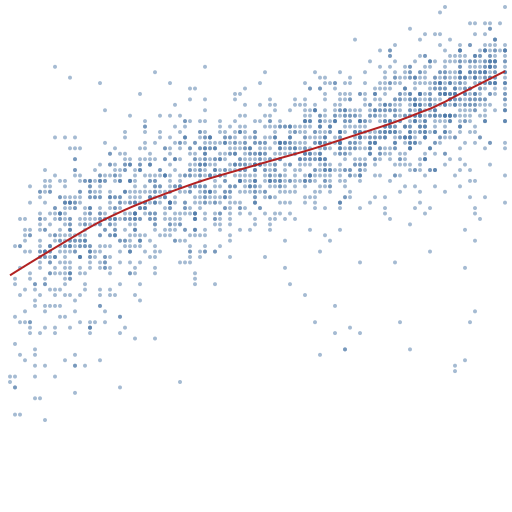

In [8]:
using VegaLite, VegaDatasets

@vgplot(
    height=500,
    padding=5,
    marks=[
        {
            encode={
                enter={
                    x={
                        field="Rotten_Tomatoes_Rating",
                        scale="x"
                    },
                    fillOpacity={
                        value=0.5
                    },
                    size={
                        value=16
                    },
                    y={
                        field="IMDB_Rating",
                        scale="y"
                    }
                }
            },
            from={
                data="movies"
            },
            type="symbol"
        },
        {
            marks=[
                {
                    encode={
                        enter={
                            stroke={
                                value="firebrick"
                            },
                            x={
                                field="u",
                                scale="x"
                            },
                            y={
                                field="v",
                                scale="y"
                            }
                        }
                    },
                    from={
                        data="curve"
                    },
                    type="line"
                }
            ],
            from={
                facet={
                    name="curve",
                    data="trend",
                    groupby="Major_Genre"
                }
            },
            type="group"
        }
    ],
    data=[
        {
            name="movies",
            values=dataset("movies"),
            transform=[
                {
                    expr="datum.Rotten_Tomatoes_Rating != null && datum.IMDB_Rating != null",
                    type="filter"
                }
            ]
        },
        {
            name="trend",
            source="movies",
            transform=[
                {
                    bandwidth={
                        signal="loessBandwidth"
                    },
                    x="Rotten_Tomatoes_Rating",
                    as=[
                        "u",
                        "v"
                    ],
                    groupby=[
                        {
                            signal="groupby === 'genre' ? 'Major_Genre' : 'foo'"
                        }
                    ],
                    type="loess",
                    y="IMDB_Rating"
                }
            ]
        }
    ],
    scales=[
        {
            name="x",
            range="width",
            domain={
                data="movies",
                field="Rotten_Tomatoes_Rating"
            },
            type="linear"
        },
        {
            name="y",
            range="height",
            domain={
                data="movies",
                field="IMDB_Rating"
            },
            type="linear"
        }
    ],
    width=500,
    autosize="pad",
    signals=[
        {
            name="loessBandwidth",
            bind={
                max=1,
                min=0.05,
                input="range"
            },
            value=0.3
        },
        {
            name="groupby",
            bind={
                options=[
                    "none",
                    "genre"
                ],
                input="select"
            },
            value="none"
        }
    ]
)